# 

In [6]:
%matplotlib nbagg
#Import required libraries
from serial import Serial
import csv
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from drawnow import drawnow, figure

In [7]:
#Functions
def initiate_reading(com,baud_rate):
    y=[]
    ser = Serial(com,baud_rate)
    time.sleep(10)
    return ser




def animate_byte(i,ser):
    b = ser.readline()# read a byte string
    string_n = b.decode()  # decode byte string into Unicode  
    string = string_n.rstrip() # remove \n and \r
    if string=='' or not string.isnumeric():
        string = '-1'
    flt = float(string)# convert string to float


    if flt !=-1:
        y.append(flt)# add to the end of data list
    ax.clear()
    ax.plot(y)



In [16]:
#Initialize arrays
y=[]
curr_slope =[]
raw_data = []

#Get csv array
csv_name = '\\result_light_high.csv'
csv_path ='C:\\Users\\a_hop\\repos\\fydp-neofeed\\sensor_data'+csv_name
file = open(csv_path)
csvreader = csv.reader(file)
csv_data = np.asarray(list(csvreader))
csv_data = csv_data.flatten().astype(np.float)


def animate(i):
    fps = 40
    val = csv_data[i]
    raw_data.append(val)
    curr_window = raw_data[i:5*fps+i]
    x =list(range(len(curr_window)))
    print(x)
    curr_slope, _, _,_,std_err = stats.linregress(x, curr_window)
    slope.append(curr_slope)
    ax.clear()
    ax.plot(raw_data)
    #ax.plot(slope)

#set up animation
fig,ax = plt.subplots(1, 1)
anim = animation.FuncAnimation(fig, animate, interval = 500)
plt.show()



C:\Users\a_hop\AppData\Local\Temp/ipykernel_10920/1005847316.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  csv_data = csv_data.flatten().astype(np.float)


<IPython.core.display.Javascript object>

# PRESSURE Sensor

RUN TEST FOR HIGH HEIGHT, MEDIUM HEIGHT, LOW HEIGHT

<IPython.core.display.Javascript object>


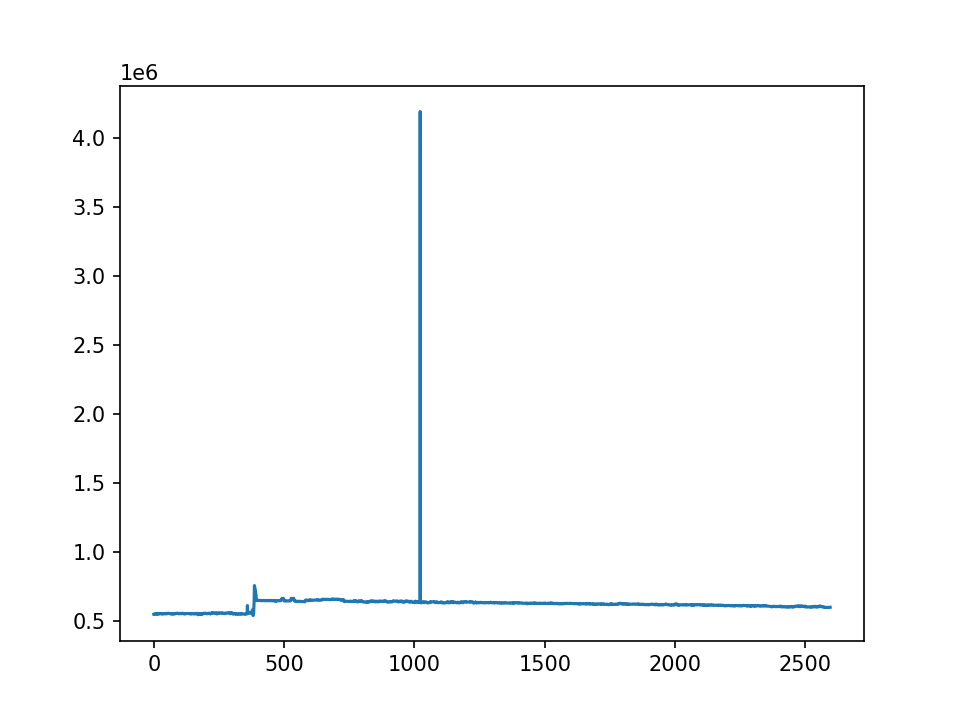

In [32]:
# Parameters
y=[]

#Initiate Reading
#ser = initiate_reading('COM3',9600)
ser = initiate_reading('COM3',57600)

# set up animation
fig,ax = plt.subplots(1, 1)
anim = animation.FuncAnimation(fig, animate_byte,fargs=(ser,),interval = 25,blit = True)
plt.show()

In [33]:
#Close Connection
ser.close()

<IPython.core.display.Javascript object>


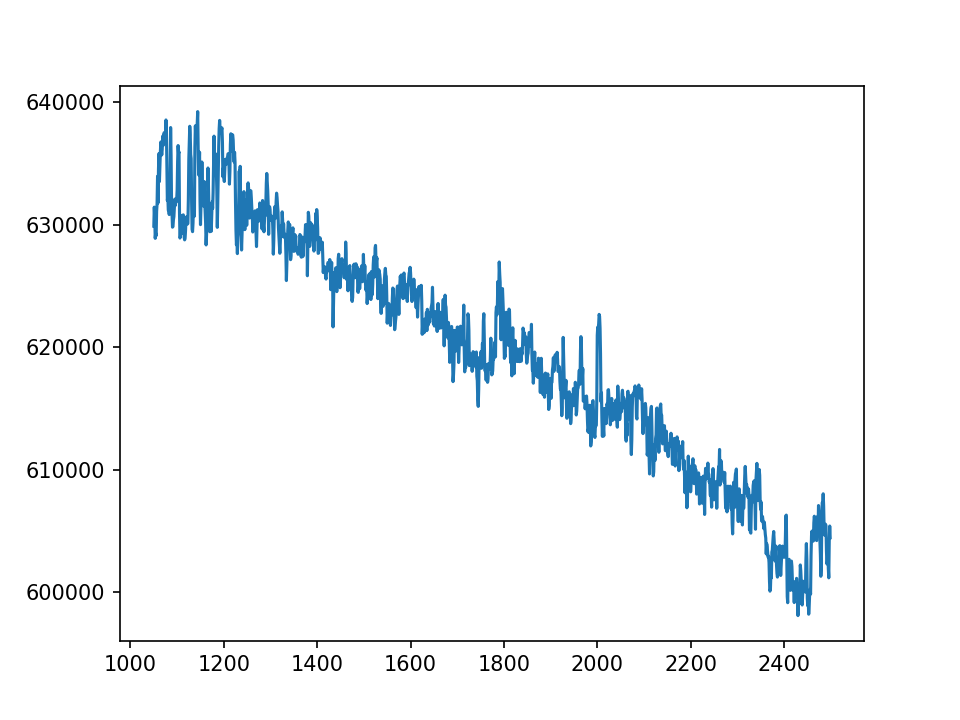

In [34]:
#Enhance graph to section we care about
i1 = 1050
i2 = 2500

fig,ax = plt.subplots(1, 1)
ax.plot(range(i1, i2, 1),y[i1:i2])
plt.show()

In [ ]:
#Get Information
i1 = int(input("Enter first index:"))
i2 = int(input("enter second index:"))

slope = (y[i2]-y[i1])/(i2-i1)
peak_value = max(y[i1:i2])
print("Slope: "+str(slope))
print("Max: "+str(peak_value))

In [ ]:
y

In [35]:
#Save this stuff
csv_name = r'\smalload_2.csv'
csv_path =r'C:\Users\a_hop\repos\fydp-neofeed\sensor_data'+csv_name

with open(csv_path, 'w',newline="") as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerows([[x] for x in y])

# LIGHT SENSOR

<IPython.core.display.Javascript object>


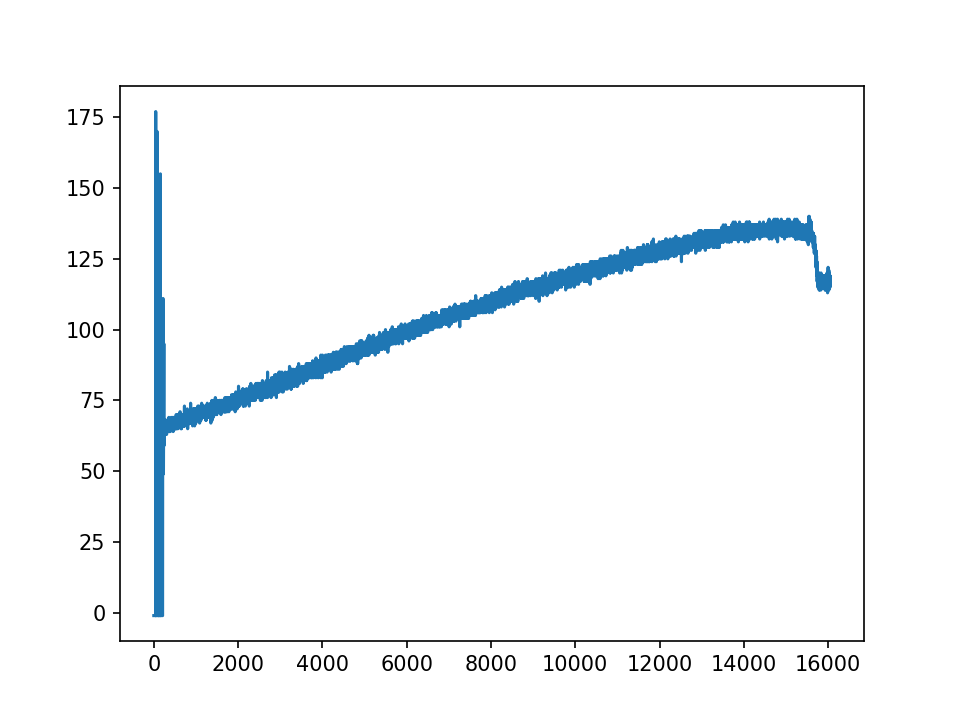

In [6]:
# Parameters
y=[]

#Initiate Reading
ser = initiate_reading('COM5',115200)

# set up animation
fig,ax = plt.subplots(1, 1)
anim = animation.FuncAnimation(fig, animate,fargs=(ser,),interval = 25,blit = True)
plt.show()

In [7]:
#Close Connection
ser.close()

In [ ]:
#Enhance graph to section we care about
i1 = int(input("Enter first index:"))
i2 = int(input("enter second index:"))

fig,ax = plt.subplots(1, 1)
ax.plot(range(i1, i2, 1),y[i1:i2])
plt.show()

In [ ]:
#Get Information
i1 = int(input("Enter first index:"))
i2 = int(input("enter second index:"))

slope = (y[i2]-y[i1])/(i2-i1)
peak_value = max(y[i1:i2])
print("Slope: "+str(slope))
print("Max: "+str(peak_value))

In [8]:
#Save this stuff
csv_name = r'\result_light_small.csv'
csv_path =r'C:\Users\a_hop\OneDrive - University of Waterloo\Year 5\Winter 2021\CAPSTONE\sensor_results'+csv_name

with open(csv_path, 'w',newline="") as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerows([[x] for x in y])